# Lab: Trees

Lab associated with Module: Trees

***

In [216]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [217]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [218]:
from IPython.display import Image
from graphviz import Digraph
from bisect import insort

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [219]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

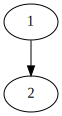

In [220]:
dot

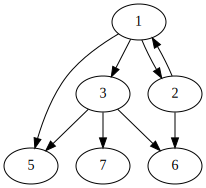

In [221]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [222]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None
        self.parent = None
        self.balance = 0


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [223]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [224]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [225]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [226]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [227]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

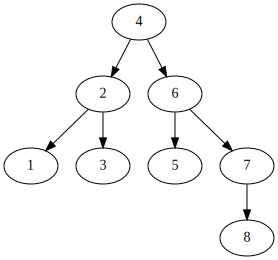

In [228]:
dot = visualize_tree(test1_tree)

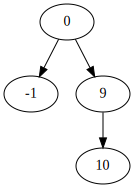

In [229]:
dot = visualize_tree(test2_tree)

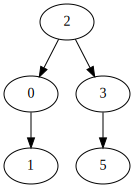

In [230]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [231]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [232]:
search(test3_tree, 3)

True

In [233]:
search(test1_tree, 18)

False

Let us write insert function now:

In [234]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

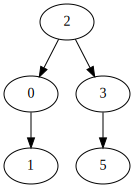

In [235]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

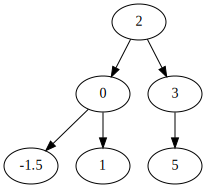

In [236]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [237]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

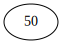

In [238]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

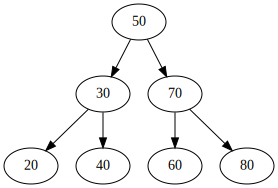

In [239]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

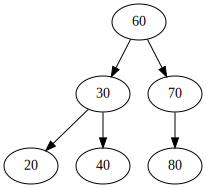

In [240]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write down code for activities in the onTrack Task sheet, in the following section </font>

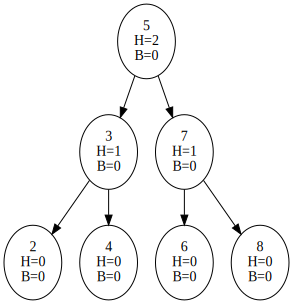

Is balanced: True


In [241]:
#Task 2
class BalancedNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None
        self.height = 0
        self.balance = 0

def update_height(node):
    left_height = node.left.height if node.left else -1
    right_height = node.right.height if node.right else -1
    node.height = max(left_height, right_height) + 1
    node.balance = left_height - right_height

def insert_balanced(root, val):
    if not root:
        return BalancedNode(val)
    
    if val < root.val:
        root.left = insert_balanced(root.left, val)
    else:
        root.right = insert_balanced(root.right, val)
    
    update_height(root)
    return root

def is_balanced(node):
    if not node:
        return True
    return abs(node.balance) <= 1 and is_balanced(node.left) and is_balanced(node.right)

# Build and visualize balanced tree
balanced_tree = None
for val in [5, 3, 7, 2, 4, 6, 8]:
    balanced_tree = insert_balanced(balanced_tree, val)

def visualize_balanced_tree(tree):
    def add_nodes(tree, dot=None):
        if dot is None:
            dot = Digraph()
            label = f"{tree.val}\\nH={tree.height}\\nB={tree.balance}"
            dot.node(name=str(id(tree)), label=label)
        
        if tree.left:
            left_label = f"{tree.left.val}\\nH={tree.left.height}\\nB={tree.left.balance}"
            dot.node(name=str(id(tree.left)), label=left_label)
            dot.edge(str(id(tree)), str(id(tree.left)))
            add_nodes(tree.left, dot)
            
        if tree.right:
            right_label = f"{tree.right.val}\\nH={tree.right.height}\\nB={tree.right.balance}"
            dot.node(name=str(id(tree.right)), label=right_label)
            dot.edge(str(id(tree)), str(id(tree.right)))
            add_nodes(tree.right, dot)
            
        return dot
    
    dot = add_nodes(tree)
    display(dot)
    return dot

visualize_balanced_tree(balanced_tree)
print("Is balanced:", is_balanced(balanced_tree))

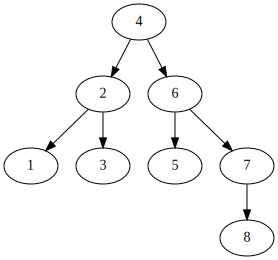

Common ancestor of 2 and 6: 4


In [242]:
#Task 3 

def find_common_ancestor(root, p, q):
    current = root
    while current:
        if p < current.val and q < current.val:
            current = current.left
        elif p > current.val and q > current.val:
            current = current.right
        else:
            return current
    return None

# Test and visualize
common_ancestor = find_common_ancestor(test1_tree, 2, 6)
dot = visualize_tree(test1_tree)
if common_ancestor:
    print("Common ancestor of 2 and 6:", common_ancestor.val)


Original tree:


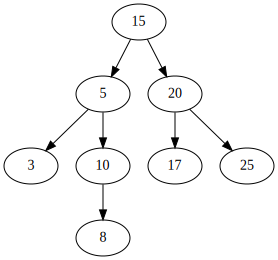


After left rotation at root:


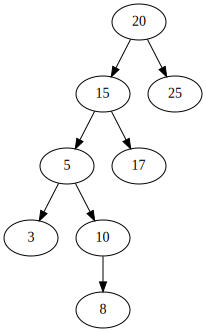


After right rotation at root:


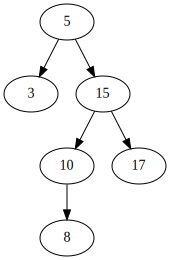


After left-right rotation at node 5:


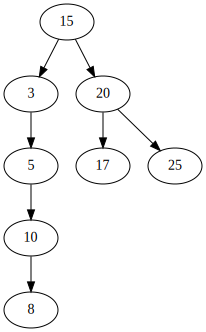


After right-left rotation at node 20:


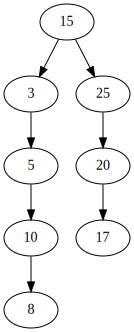

In [243]:
#Task 4 

def left_rotate(x):
    "Perform left rotation at node x"
    y = x.right
    if y is None:
        return x  # Cannot rotate if no right child
    
    # Perform rotation
    x.right = y.left
    y.left = x
    return y

def right_rotate(y):
    "Perform right rotation at node y"
    x = y.left
    if x is None:
        return y  # Cannot rotate if no left child
    
    # Perform rotation
    y.left = x.right
    x.right = y
    return x

def left_right_rotate(z):
    "Left-Right (Double) Rotation at node z"
    if z.left is None:
        return z
    
    # First perform left rotation on left child
    z.left = left_rotate(z.left)
    
    # Then perform right rotation on z
    return right_rotate(z)

def right_left_rotate(z):
    "Right-Left (Double) Rotation at node z"
    if z.right is None:
        return z
    
    # First perform right rotation on right child
    z.right = right_rotate(z.right)
    
    # Then perform left rotation on z
    return left_rotate(z)

def build_rotation_tree():
    root = Node(15)
    
    # Left subtree
    root.left = Node(5)
    root.left.left = Node(3)
    root.left.right = Node(10)
    root.left.right.left = Node(8) 
    
     # Right subtree
    root.right = Node(20)
    root.right.left = Node(17)
    root.right.right = Node(25)
    
    return root


# Create test tree for rotations
print("Original tree:")
rotation_tree = build_rotation_tree()
dot_original = visualize_tree(rotation_tree)

print("\nAfter left rotation at root:")
try:
    rotated = left_rotate(rotation_tree)
    dot_left = visualize_tree(rotated)
except Exception as e:
    print(f"Cannot perform left rotation: {str(e)}")

print("\nAfter right rotation at root:")
try:
    rotated = right_rotate(rotation_tree)
    dot_right = visualize_tree(rotated)
except Exception as e:
    print(f"Cannot perform right rotation: {str(e)}")

# Create a copy for double rotations
double_rot_tree = build_rotation_tree()

print("\nAfter left-right rotation at node 5:")
if double_rot_tree.left:
    # Perform left-right rotation on left child (node 5)
    double_rot_tree.left = left_right_rotate(double_rot_tree.left)
    dot_lr = visualize_tree(double_rot_tree)
else:
    print("No left child to rotate")

print("\nAfter right-left rotation at node 20:")
if double_rot_tree.right:
    # Perform right-left rotation on right child (node 20)
    double_rot_tree.right = right_left_rotate(double_rot_tree.right)
    dot_rl = visualize_tree(double_rot_tree)
else:
    print("No right child to rotate")


Initial state:



Inserting 18:


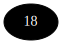


Inserting 2:


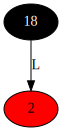


Inserting 1:


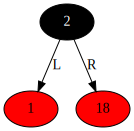


Inserting 12:


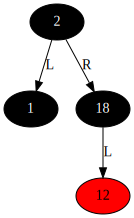


Inserting 15:


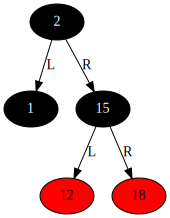


Inserting 9:


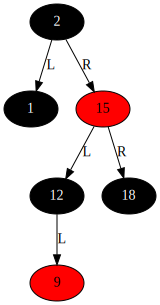


Inserting 10:


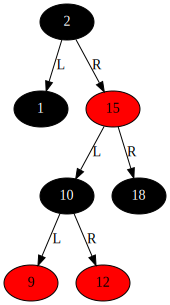


Inserting 13:


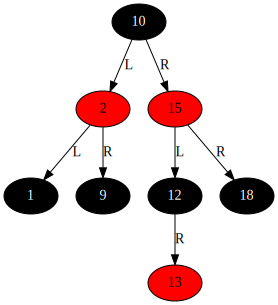


Inserting 6:


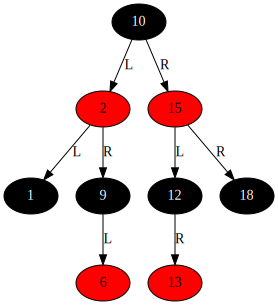


Inserting 7:


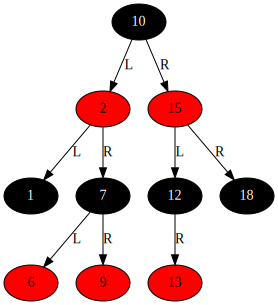


Inserting 4:


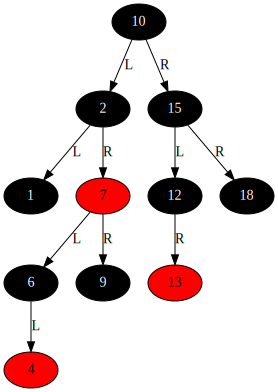


Inserting 29:


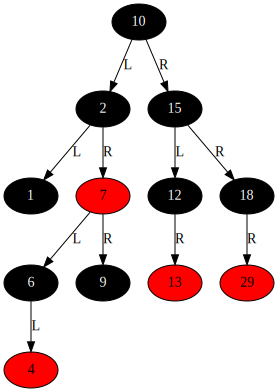


Deleting 2:


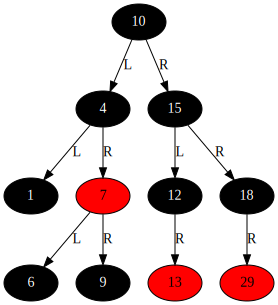


Deleting 29:


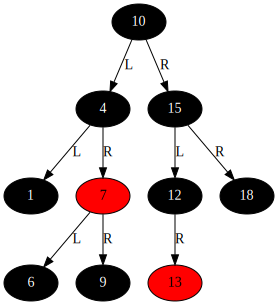


Deleting 18:


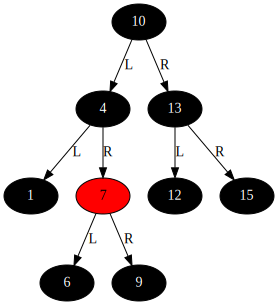

In [244]:
#Task 5


RED = True
BLACK = False

class RBNode:
    def __init__(self, val, color=RED):
        self.val = val
        self.color = color
        self.left = None
        self.right = None
        self.parent = None

class RedBlackTree:
    def __init__(self):
        self.nil = RBNode(0, BLACK)
        self.nil.left = self.nil
        self.nil.right = self.nil
        self.nil.parent = self.nil
        self.root = self.nil
    
    def _left_rotate(self, x):
        "Left rotation at node x"
        y = x.right
        x.right = y.left
        
        if y.left != self.nil:
            y.left.parent = x
        
        y.parent = x.parent
        if x.parent == self.nil:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        
        y.left = x
        x.parent = y
        return y
    
    def _right_rotate(self, y):
        "Right rotation at node y"
        x = y.left
        y.left = x.right
        
        if x.right != self.nil:
            x.right.parent = y
        
        x.parent = y.parent
        if y.parent == self.nil:
            self.root = x
        elif y == y.parent.right:
            y.parent.right = x
        else:
            y.parent.left = x
        
        x.right = y
        y.parent = x
        return x
    
    def insert(self, val):
        "Insert value into tree"
        new_node = RBNode(val)
        new_node.left = self.nil
        new_node.right = self.nil
        new_node.parent = self.nil
        
        current = self.root
        parent = self.nil
        while current != self.nil:
            parent = current
            if val < current.val:
                current = current.left
            else:
                current = current.right
                
        new_node.parent = parent
        if parent == self.nil:
            self.root = new_node
        elif val < parent.val:
            parent.left = new_node
        else:
            parent.right = new_node
            
        self._insert_fixup(new_node)
        return new_node
    
    def _insert_fixup(self, node):
        "Fix red-black tree properties after insertion"
        while node.parent.color == RED:
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle.color == RED:
                    # Case 1: Uncle is red
                    node.parent.color = BLACK
                    uncle.color = BLACK
                    node.parent.parent.color = RED
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        # Case 2: Uncle is black, node is right child
                        node = node.parent
                        self._left_rotate(node)
                    # Case 3: Uncle is black, node is left child
                    node.parent.color = BLACK
                    node.parent.parent.color = RED
                    self._right_rotate(node.parent.parent)
            else:
                # Mirror cases
                uncle = node.parent.parent.left
                if uncle.color == RED:
                    node.parent.color = BLACK
                    uncle.color = BLACK
                    node.parent.parent.color = RED
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self._right_rotate(node)
                    node.parent.color = BLACK
                    node.parent.parent.color = RED
                    self._left_rotate(node.parent.parent)
                    
            if node == self.root:
                break
                
        self.root.color = BLACK
    
    def _transplant(self, u, v):
        "Replace subtree rooted at u with subtree rooted at v"
        if u.parent == self.nil:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent
    
    def _minimum(self, node):
        "Find minimum node in subtree"
        while node.left != self.nil:
            node = node.left
        return node
    
    def _find_node(self, val):
        "Find node with given value"
        current = self.root
        while current != self.nil:
            if val == current.val:
                return current
            elif val < current.val:
                current = current.left
            else:
                current = current.right
        return self.nil
    
    def delete(self, val):
        "Delete value from tree"
        node = self._find_node(val)
        if node == self.nil:
            return
            
        y = node
        y_original_color = y.color
        if node.left == self.nil:
            x = node.right
            self._transplant(node, node.right)
        elif node.right == self.nil:
            x = node.left
            self._transplant(node, node.left)
        else:
            y = self._minimum(node.right)
            y_original_color = y.color
            x = y.right
            if y.parent == node:
                x.parent = y
            else:
                self._transplant(y, y.right)
                y.right = node.right
                y.right.parent = y
                
            self._transplant(node, y)
            y.left = node.left
            y.left.parent = y
            y.color = node.color
            
        if y_original_color == BLACK:
            self._delete_fixup(x)
    
    def _delete_fixup(self, x):
        "Fix red-black tree properties after deletion"
        while x != self.root and x.color == BLACK:
            if x == x.parent.left:
                w = x.parent.right
                if w.color == RED:
                    # Case 1: Sibling is red
                    w.color = BLACK
                    x.parent.color = RED
                    self._left_rotate(x.parent)
                    w = x.parent.right
                
                if w.left.color == BLACK and w.right.color == BLACK:
                    # Case 2: Both siblings children are black
                    w.color = RED
                    x = x.parent
                else:
                    if w.right.color == BLACK:
                        # Case 3: Sibling's right child is black
                        w.left.color = BLACK
                        w.color = RED
                        self._right_rotate(w)
                        w = x.parent.right
                    
                    # Case 4: Sibling's right child is red
                    w.color = x.parent.color
                    x.parent.color = BLACK
                    w.right.color = BLACK
                    self._left_rotate(x.parent)
                    x = self.root
            else:
                # Mirror cases
                w = x.parent.left
                if w.color == RED:
                    w.color = BLACK
                    x.parent.color = RED
                    self._right_rotate(x.parent)
                    w = x.parent.left
                
                if w.right.color == BLACK and w.left.color == BLACK:
                    w.color = RED
                    x = x.parent
                else:
                    if w.left.color == BLACK:
                        w.right.color = BLACK
                        w.color = RED
                        self._left_rotate(w)
                        w = x.parent.left
                    
                    w.color = x.parent.color
                    x.parent.color = BLACK
                    w.left.color = BLACK
                    self._right_rotate(x.parent)
                    x = self.root
                    
        x.color = BLACK
    
    def visualize(self):
        "Visualize tree using Graphviz"
        dot = Digraph()
        self._add_nodes(self.root, dot)
        display(dot)
        return dot
    
    def _add_nodes(self, node, dot):
        "Recursively add nodes to Graphviz diagram"
        if node == self.nil:
            return
        
        node_id = str(id(node))
        color = "red" if node.color == RED else "black"
        font_color = "white" if node.color == BLACK else "black"
        dot.node(node_id, label=str(node.val), style="filled", fillcolor=color, fontcolor=font_color)
        
        if node.left != self.nil:
            left_id = str(id(node.left))
            self._add_nodes(node.left, dot)
            dot.edge(node_id, left_id, label="L")
            
        if node.right != self.nil:
            right_id = str(id(node.right))
            self._add_nodes(node.right, dot)
            dot.edge(node_id, right_id, label="R")
    
    def print_step(self, action, val=None):
        "Print and visualize current step"
        if val is not None:
            print(f"\n{action} {val}:")
        else:
            print(f"\n{action}:")
        self.visualize()

# Create and visualize Red-Black Tree
rbt = RedBlackTree()

# Initial state
rbt.print_step("Initial state")

# Insertion sequence
values = [18, 2, 1, 12, 15, 9, 10, 13, 6, 7, 4, 29]
for val in values:
    rbt.insert(val)
    rbt.print_step("Inserting", val)

# Deletion sequence
deletions = [2, 29, 18]
for val in deletions:
    rbt.delete(val)
    rbt.print_step("Deleting", val)


Task 6: B+ Tree Insertion (m=3)
Insertion sequence:

After 3 insertions:


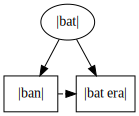


After 6 insertions:


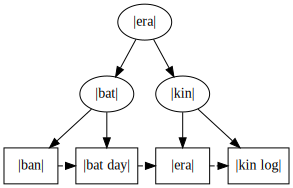


After 9 insertions:


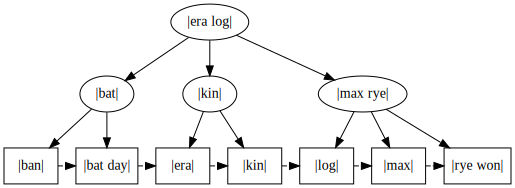


After 12 insertions:


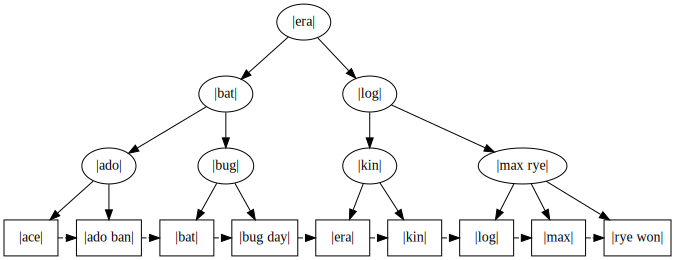


After 15 insertions:


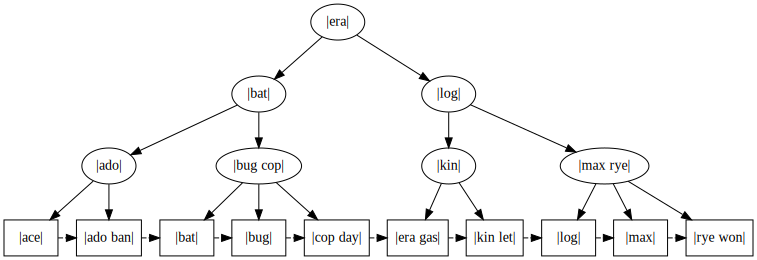


Final B+ Tree:


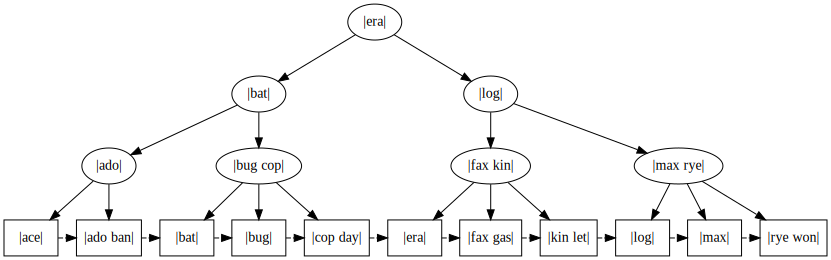

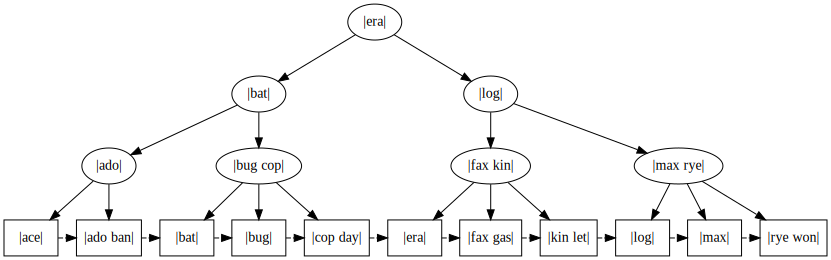

In [245]:
#Task 6
class BPlusTreeNode:
    def __init__(self, is_leaf=True):
        self.keys = []
        self.children = []
        self.is_leaf = is_leaf
        self.next = None  # For leaf nodes
        self.parent = None

class BPlusTree:
    def __init__(self, order=3):
        self.order = order
        self.root = BPlusTreeNode(is_leaf=True)
        self.max_keys = order - 1
        
    def _find_leaf(self, key):
        """Find the leaf node where the key should be inserted"""
        current = self.root
        while not current.is_leaf:
            # Find the appropriate child to follow
            idx = 0
            while idx < len(current.keys) and key >= current.keys[idx]:
                idx += 1
            current = current.children[idx]
        return current
    
    def _find_leftmost_leaf(self):
        """Find the leftmost leaf in the tree"""
        current = self.root
        while not current.is_leaf:
            current = current.children[0]
        return current
    
    def insert(self, key):
        leaf = self._find_leaf(key)
        self._insert_into_leaf(leaf, key)
        
        if len(leaf.keys) > self.max_keys:
            self._split_leaf(leaf)
    
    def _insert_into_leaf(self, node, key):
        # Find position to insert
        pos = 0
        while pos < len(node.keys) and key > node.keys[pos]:
            pos += 1
        node.keys.insert(pos, key)
    
    def _split_leaf(self, node):
        mid = len(node.keys) // 2
        new_node = BPlusTreeNode(is_leaf=True)
        
        # Split keys
        new_node.keys = node.keys[mid:]
        node.keys = node.keys[:mid]
        
        # Update sibling pointers
        new_node.next = node.next
        node.next = new_node
        
        # Push up middle key to parent
        self._insert_into_parent(node, new_node.keys[0], new_node)
    
    def _insert_into_parent(self, left, key, right):
        if left == self.root:
            # Create new root
            new_root = BPlusTreeNode(is_leaf=False)
            new_root.keys = [key]
            new_root.children = [left, right]
            self.root = new_root
            left.parent = new_root
            right.parent = new_root
            return
        
        parent = left.parent
        # Find position to insert
        pos = 0
        while pos < len(parent.keys) and key > parent.keys[pos]:
            pos += 1
        
        parent.keys.insert(pos, key)
        parent.children.insert(pos+1, right)
        right.parent = parent
        
        if len(parent.keys) > self.max_keys:
            self._split_internal(parent)
    
    def _split_internal(self, node):
        mid = len(node.keys) // 2
        mid_key = node.keys[mid]
        
        new_node = BPlusTreeNode(is_leaf=False)
        new_node.keys = node.keys[mid+1:]
        new_node.children = node.children[mid+1:]
        node.keys = node.keys[:mid]
        node.children = node.children[:mid+1]
        
        # Update parent pointers
        for child in new_node.children:
            child.parent = new_node
            
        # Push up middle key to parent
        self._insert_into_parent(node, mid_key, new_node)
    
    def visualize(self):
        """Visualize B+ Tree"""
        dot = Digraph()
        self._add_nodes(self.root, dot)
        
        # Add horizontal links for leaf nodes
        current = self._find_leftmost_leaf()
        while current and current.next:
            dot.edge(str(id(current)), str(id(current.next)), style="dashed", constraint="false")
            current = current.next
            
        display(dot)
        return dot
    
    def _add_nodes(self, node, dot):
        node_id = str(id(node))
        label = "|" + " ".join(str(k) for k in node.keys) + "|"
        shape = "rectangle" if node.is_leaf else "ellipse"
        dot.node(node_id, label=label, shape=shape)
        
        if not node.is_leaf:
            for child in node.children:
                child_id = str(id(child))
                self._add_nodes(child, dot)
                dot.edge(node_id, child_id)

print("\n" + "="*50)
print("Task 6: B+ Tree Insertion (m=3)")
print("="*50)
strings = ["era", "ban", "bat", "kin", 
           "day", "log", "rye", "max", 
           "won", "ace", "ado", "bug",
           "cop", "gas", "let", "fax"]
bptree = BPlusTree(order=3)

print("Insertion sequence:")
for i, s in enumerate(strings):
    bptree.insert(s)
    if (i+1) % 3 == 0:
        print(f"\nAfter {i+1} insertions:")
        bptree.visualize()

print("\nFinal B+ Tree:")
bptree.visualize()

B Tree (m=3):


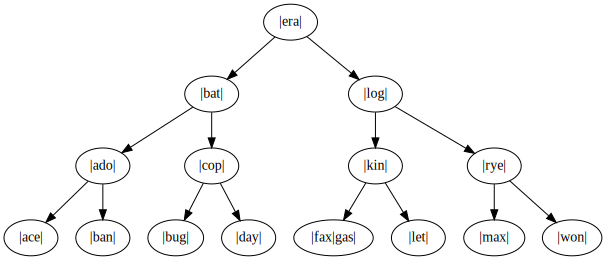

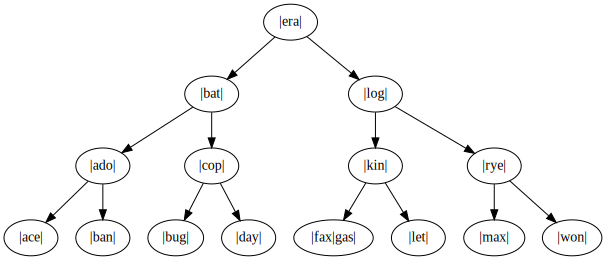

In [246]:
#Task 7
class BTreeNode:
    def __init__(self):
        self.keys = []
        self.children = []
        self.parent = None  # Adding a parent pointer
        
    def __str__(self):
        return "|" + " ".join(str(k) for k in self.keys) + "|"

class BTree:
    def __init__(self, order=3):
        self.order = order
        self.root = BTreeNode()
        self.max_keys = order - 1
        self.min_keys = (order) // 2  # Minimum number of keywords
    
    def insert(self, key):
        # Find the insertion position starting from the root
        current = self.root
        path = []  # Recording paths for backtracking
        
        while current.children:
            i = len(current.keys) - 1
            while i >= 0 and key < current.keys[i]:
                i -= 1
            i += 1
            
            path.append((current, i))
            current = current.children[i]
        
        # Insert at the leaf node
        insort(current.keys, key)
        
        # Leaf node overflow
        "Process splits leaf → parent node → root node"
        while len(current.keys) > self.max_keys:
            if current == self.root:
                self._split_root()
                break
            else:
                current = self._split_node(current, path)
                if not path: 
                    break
                current, idx = path.pop()
    
    def _split_root(self):
        
        new_root = BTreeNode()
        left_child = self.root
        
        mid = (len(left_child.keys) - 1) // 2
        #mid = (len(left_child.keys)) // 2
        mid_key = left_child.keys[mid]
        
        # Create the right child node
        right_child = BTreeNode()
        right_child.keys = left_child.keys[mid+1:]
        right_child.children = left_child.children[mid+1:] if left_child.children else []
        for child in right_child.children:
            child.parent = right_child
        
        # Left child
        left_child.keys = left_child.keys[:mid]
        left_child.children = left_child.children[:mid+1] if left_child.children else []
        
        # Set new root
        new_root.keys = [mid_key]
        new_root.children = [left_child, right_child]
        left_child.parent = new_root
        right_child.parent = new_root
        self.root = new_root
    
    def _split_node(self, node, path):
        # Get the parent node and the index of the current node
        parent, idx = path[-1] if path else (None, 0)
        if not parent:
            return node
        
        mid = (len(node.keys) - 1) // 2
        mid_key = node.keys[mid]
        
        # Create a new node
        new_node = BTreeNode()
        new_node.keys = node.keys[mid+1:]
        new_node.children = node.children[mid+1:] if node.children else []
        for child in new_node.children:
            child.parent = new_node
        new_node.parent = parent
        node.keys = node.keys[:mid]
        node.children = node.children[:mid+1] if node.children else []
        parent.keys.insert(idx, mid_key)
        parent.children.insert(idx+1, new_node)
        
        return parent
    
    def visualize(self):
        dot = Digraph()
        self._add_nodes(self.root, dot)
        display(dot)
        return dot
    
    def _add_nodes(self, node, dot):
        if not node.keys:  # Skip empty nodes
            return
            
        node_id = str(id(node))
        label = "|" + "|".join(f"{k}" for k in node.keys) + "|"
        dot.node(node_id, label=label)
        
        for child in node.children:
            if child.keys:  # Only add child nodes with keywords
                child_id = str(id(child))
                self._add_nodes(child, dot)
                dot.edge(node_id, child_id)

# using task 6 values
strings = ["era", "ban", "bat", "kin", "day", "log", 
           "rye", "max", "won", "ace", "ado", "bug",
           "cop", "gas", "let", "fax"]

btree = BTree(order=3)
for s in strings:
    btree.insert(s)

print("B Tree (m=3):")
btree.visualize()

In [247]:
#Task 9 

function range_query_bplus_tree(root, start_key, end_key):
    
    // 1. Find the leaf node containing the start key
    current_node = root
    
    while current_node is not leaf node:
        // Find the first key greater than or equal to start_key 
        
        in the current node
        index = 0
        
        while index < current_node.key_count and start_key > current_node.keys[index]:
            index = index + 1
        current_node = current_node.children[index]

    // 2. Initialize the result set
    
    results = empty list

    // 3. Traverse the leaf nodes until the end key
    
    while current_node is not null:
        for each key in current_node.keys:
            if key >= start_key and key <= end_key:
                add key to results
            else if key > end_key:
                return results // Out of range, end query

        // Move to the next leaf node
        current_node = current_node.next

    return results

SyntaxError: invalid syntax (<ipython-input-247-fbc4abc813a4>, line 3)